In [24]:
from monty.serialization import loadfn
import pandas as pd
data = loadfn('./fast_diffusion_3.json')

In [25]:
entry = data['mp-2530']

In [26]:
entry.data.keys()

dict_keys(['m3gnet', 'multi_hse_band_gap', 'msd_data', 'rxn_LTO_1', 'rxn_Li_1', 'echem_window_new', 'rxn_LiFePO4_1', 'rxn_LCO_1', 'rxn_NCM_1', 'rxn_LMO_1'])

In [27]:
msd_data = entry.data["msd_data"]
msd_data

{'structure': Structure Summary
 Lattice
     abc : 4.606441469185514 4.606441469185514 4.606441469185514
  angles : 59.99999999999999 59.99999999999999 59.99999999999999
  volume : 69.11648984895743
       A : 0.0 3.257246 3.257246
       B : 3.257246 0.0 3.257246
       C : 3.257246 3.257246 0.0
     pbc : True True True
 PeriodicSite: Li (4.8859, 4.8859, 4.8859) [0.7500, 0.7500, 0.7500]
 PeriodicSite: Li (1.6286, 1.6286, 1.6286) [0.2500, 0.2500, 0.2500]
 PeriodicSite: Te (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
 '800K_msd': 359.171,
 '1200K_msd': 486.035}

In [28]:
x_structure = entry.data["msd_data"]["structure"]
print(x_structure)

Full Formula (Li2 Te1)
Reduced Formula: Li2Te
abc   :   4.606441   4.606441   4.606441
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (3)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Li    0.75  0.75  0.75
  1  Li    0.25  0.25  0.25
  2  Te    0     0     0


In [29]:
x_composition = x_structure.composition
print(x_composition)

Li2 Te1


In [30]:
msd_800 = msd_data["800K_msd"]
msd_1200 = msd_data["1200K_msd"]
y = round(msd_1200 / msd_800, 2)
print(y)

1.35


In [31]:
s1 = []
l = {}
for i in data:
    x_structure = data[i].structure
    x_composition = x_structure.composition
    s1.append(x_composition)
l["composition"] = s1

In [32]:
s2 = []
for i in data:
    x_structure = data[i].structure
    s2.append(x_structure)
l["structure"] = s2

In [33]:
s3 = []
for i in data:
    msd = data[i].data["msd_data"]
    s3.append(msd["1200K_msd"]/msd["800K_msd"])
l["target"] = s3

In [34]:
df = pd.DataFrame.from_dict(l)
df

,composition,structure,target
0,"(Li, Te)","[[4.885869 4.885869 4.885869] Li, [1.628623 1....",1.353213
1,"(Li, Zn, S)",[[ 8.72935217e-08 -1.19839768e-07 7.39993177e...,1.819252
2,"(Li, Zn, S)","[[2.95814977 2.95814965 2.41006338] Li, [2.958...",1.968336
3,"(Zn, Li, S)",[[ 2.64760796e+00 2.64760802e+00 -1.30237421e...,1.198337
4,"(Zn, S, Li)","[[4.55295033 4.47917018 2.44125092] Zn, [1.391...",1.878736
...,...,...,...
4129,"(Ag, Li, Al, S)","[[5.23369841 1.99996136 0.17881617] Ag, [1.791...",1.933322
4130,"(Ag, Al, Li, Cl)","[[2.47719333 7.43158195 7.43158132] Ag, [7.431...",2.443392
4131,"(Ag, Li, Al, Cl)","[[3.41328085 1.97065021 5.98312206] Ag, [-1.26...",1.826917
4132,"(Ag, Al, Li, Br)","[[2.65444703 7.96334166 7.96334154] Ag, [7.963...",1.737444


In [35]:
from matminer.featurizers.structure import DensityFeatures
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

In [36]:
ep = ElementProperty.from_preset("magpie")
df = ep.featurize_dataframe(df, "composition")
df.head()

,composition,structure,target,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,"(Li, Te)","[[4.885869 4.885869 4.885869] Li, [1.628623 1....",1.353213,3.0,52.0,49.0,19.333333,21.777778,3.0,1.0,...,0.0,0.0,0.0,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0
1,"(Li, Zn, S)",[[ 8.72935217e-08 -1.19839768e-07 7.39993177e...,1.819252,3.0,30.0,27.0,9.840000,7.660800,3.0,1.0,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,168.960000,71.251200,229.0
2,"(Li, Zn, S)","[[2.95814977 2.95814965 2.41006338] Li, [2.958...",1.968336,3.0,30.0,27.0,12.782609,8.506616,3.0,1.0,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,160.695652,70.979206,229.0
3,"(Zn, Li, S)",[[ 2.64760796e+00 2.64760802e+00 -1.30237421e...,1.198337,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,125.250000,69.062500,70.0
4,"(Zn, S, Li)","[[4.55295033 4.47917018 2.44125092] Zn, [1.391...",1.878736,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,0.0,0.0,0.0,0.0,70.0,229.0,159.0,125.250000,69.062500,70.0


In [37]:
densityf = DensityFeatures()
df = densityf.featurize_dataframe(df, "structure")
df.head()

,composition,structure,target,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa,packing fraction
0,"(Li, Te)","[[4.885869 4.885869 4.885869] Li, [1.628623 1....",1.353213,3.0,52.0,49.0,19.333333,21.777778,3.0,1.0,...,0.0,152.0,229.0,77.0,203.333333,34.222222,229.0,3.399137,23.038830,0.535822
1,"(Li, Zn, S)",[[ 8.72935217e-08 -1.19839768e-07 7.39993177e...,1.819252,3.0,30.0,27.0,9.840000,7.660800,3.0,1.0,...,0.0,70.0,229.0,159.0,168.960000,71.251200,229.0,2.021074,16.977037,0.558618
2,"(Li, Zn, S)","[[2.95814977 2.95814965 2.41006338] Li, [2.958...",1.968336,3.0,30.0,27.0,12.782609,8.506616,3.0,1.0,...,0.0,70.0,229.0,159.0,160.695652,70.979206,229.0,2.570456,17.403808,0.516188
3,"(Zn, Li, S)",[[ 2.64760796e+00 2.64760802e+00 -1.30237421e...,1.198337,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,0.0,70.0,229.0,159.0,125.250000,69.062500,70.0,2.494957,19.934797,0.356099
4,"(Zn, S, Li)","[[4.55295033 4.47917018 2.44125092] Zn, [1.391...",1.878736,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,0.0,70.0,229.0,159.0,125.250000,69.062500,70.0,2.454654,20.262105,0.350346


In [38]:
y = df["target"].values
print(y)

[1.35321337 1.81925223 1.96833584 ... 1.82691659 1.73744355 1.24649151]


In [39]:
x = df.drop(["structure", "composition", "target"], axis=1)
x.columns

Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'MagpieData mode GSmagmom', 'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber', 'density', 'vpa',
       'packing fraction'],
      dtype='object', length=135)

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=1)

In [41]:
rf.fit(x, y)

RandomForestRegressor(random_state=1) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. RandomForestRegressor RandomForestRegressor(random_state=1)

In [42]:
y_pred = rf.predict(x)

In [43]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print("training RMSE = {:.3f}".format(np.sqrt(mse)))

training RMSE = 0.180


In [44]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x, y, scoring="neg_mean_squared_error", cv=kfold)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
print("Mean RMSE: {:.3f}".format(np.mean(rmse_scores)))

Mean RMSE: 0.483


In [46]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf, x, y, cv=kfold)

In [47]:
df["target predicted"] = y_pred
df["percentage error"] = (df["target"] - df["target predicted"]).abs()/df["target"] * 100
df

,composition,structure,target,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,density,vpa,packing fraction,target predicted,percentage error
0,"(Li, Te)","[[4.885869 4.885869 4.885869] Li, [1.628623 1....",1.353213,3.0,52.0,49.0,19.333333,21.777778,3.0,1.0,...,229.0,77.0,203.333333,34.222222,229.0,3.399137,23.038830,0.535822,1.867117,37.976572
1,"(Li, Zn, S)",[[ 8.72935217e-08 -1.19839768e-07 7.39993177e...,1.819252,3.0,30.0,27.0,9.840000,7.660800,3.0,1.0,...,229.0,159.0,168.960000,71.251200,229.0,2.021074,16.977037,0.558618,2.229243,22.536218
2,"(Li, Zn, S)","[[2.95814977 2.95814965 2.41006338] Li, [2.958...",1.968336,3.0,30.0,27.0,12.782609,8.506616,3.0,1.0,...,229.0,159.0,160.695652,70.979206,229.0,2.570456,17.403808,0.516188,2.003884,1.806007
3,"(Zn, Li, S)",[[ 2.64760796e+00 2.64760802e+00 -1.30237421e...,1.198337,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,229.0,159.0,125.250000,69.062500,70.0,2.494957,19.934797,0.356099,2.090811,74.476023
4,"(Zn, S, Li)","[[4.55295033 4.47917018 2.44125092] Zn, [1.391...",1.878736,3.0,30.0,27.0,14.500000,5.750000,16.0,1.0,...,229.0,159.0,125.250000,69.062500,70.0,2.454654,20.262105,0.350346,1.613957,14.093421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,"(Ag, Li, Al, S)","[[5.23369841 1.99996136 0.17881617] Ag, [1.791...",1.933322,3.0,47.0,44.0,18.000000,11.600000,16.0,1.0,...,229.0,159.0,164.200000,75.360000,70.0,3.304791,19.686594,0.495571,2.011720,4.055054
4130,"(Ag, Al, Li, Cl)","[[2.47719333 7.43158195 7.43158132] Ag, [7.431...",2.443392,3.0,47.0,44.0,18.181818,7.859504,17.0,1.0,...,229.0,165.0,130.590909,78.698347,64.0,2.956976,22.110941,0.356403,1.925771,21.184512
4131,"(Ag, Li, Al, Cl)","[[3.41328085 1.97065021 5.98312206] Ag, [-1.26...",1.826917,3.0,47.0,44.0,21.200000,10.320000,17.0,1.0,...,229.0,165.0,128.800000,77.760000,64.0,3.013394,25.479411,0.315543,1.841000,0.770862
4132,"(Ag, Al, Li, Br)","[[2.65444703 7.96334166 7.96334154] Ag, [7.963...",1.737444,3.0,47.0,44.0,28.818182,12.264463,35.0,1.0,...,229.0,165.0,130.590909,78.698347,64.0,4.006537,27.205053,0.337057,1.803167,3.782748


In [48]:
import plotly.express as px
import plotly.graph_objects as go
reference_line = go.Scatter(
    x = [0, 3],
    y = [0, 3],
    line=dict(color="black", dash="dash"),
    mode="lines",
    showlegend=False
)
fig = px.scatter(
    df,
    x="target",
    y="target predicted",
    color_continuous_scale=px.colors.sequential.Bluered,
)
fig.add_trace(reference_line)
fig.show()

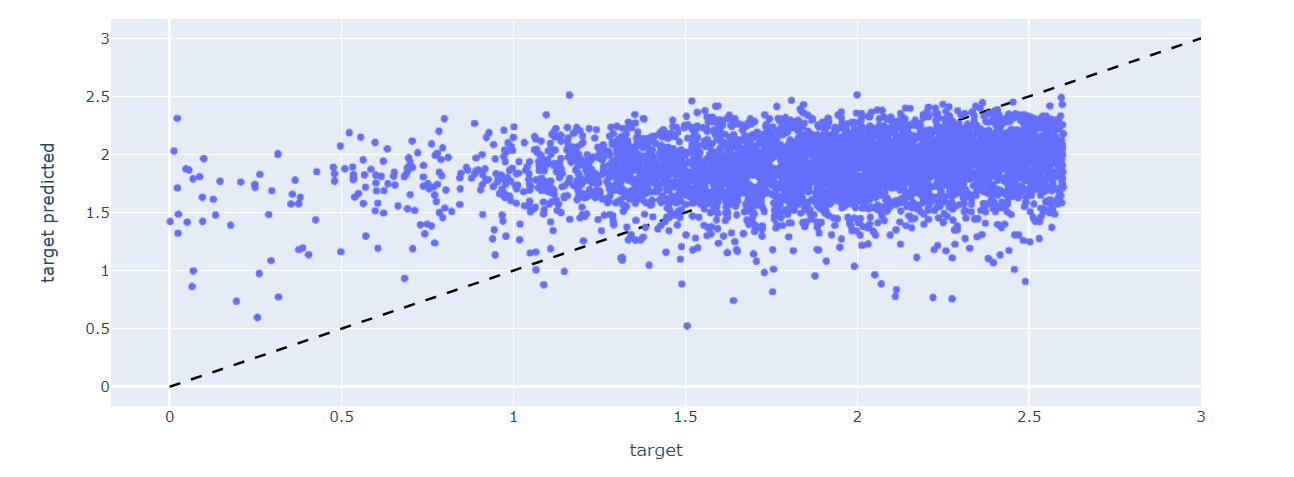

In [49]:
importances = rf.feature_importances_
included = x.columns.values
indices = np.argsort(importances)[::-1]

fig_bar = px.bar(
    x = included[indices][0:5],
    y = importances[indices][0:5],
    title="Feature importances of Random Forest",
    labels={"x": "Feature", "y": "Importance"}
)
fig_bar.show()

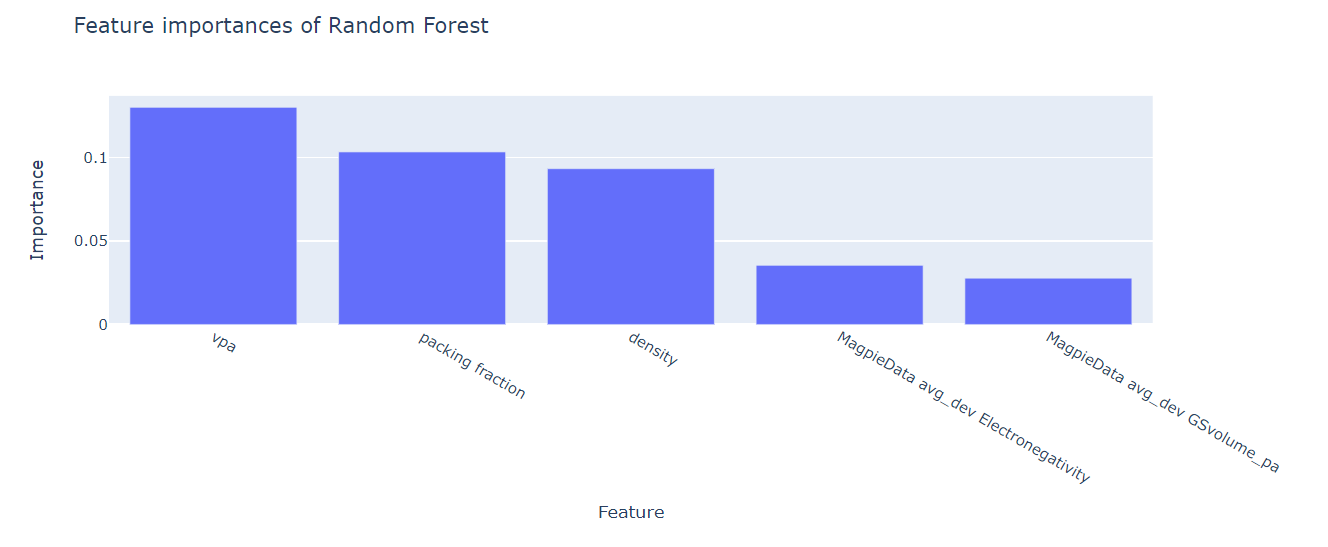